In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

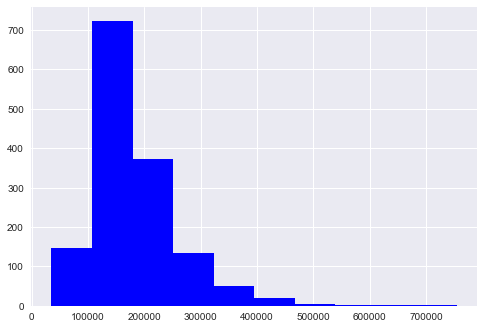

In [33]:
plt.hist(train.SalePrice,color='blue')
plt.show()

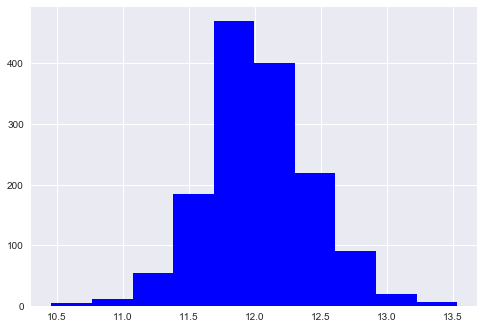

In [34]:
target=np.log(train['SalePrice'])
plt.hist(target,color='blue')
plt.show()

In [35]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [36]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [38]:
total = all_data.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total'])
missing_data.head(35)

,Total
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageYrBlt,159
GarageFinish,159


In [26]:
all_data = all_data.drop((missing_data[missing_data['Total'] > 4]).index,1)
all_data.describe()

C:\Users\Himanshu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.792749,9.094785,6.089072,5.564577,1971.312778,1984.264474,-inf,-inf,-inf,-inf,...,472.874572,-inf,-inf,-inf,-inf,-inf,-inf,-inf,6.213087,2007.792737
std,0.708866,0.509966,1.409947,1.113131,30.291442,20.894344,NaN,NaN,NaN,NaN,...,215.394815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.714762,1.314964
min,2.995732,7.170120,1.000000,1.000000,1872.000000,1950.000000,-inf,-inf,-inf,-inf,...,0.000000,-inf,-inf,-inf,-inf,-inf,-inf,-inf,1.000000,2006.000000
25%,2.995732,8.919721,5.000000,5.000000,1953.500000,1965.000000,-inf,-inf,5.393628,6.675823,...,320.000000,-inf,-inf,-inf,-inf,-inf,-inf,-inf,4.000000,2007.000000
50%,3.912023,9.154087,6.000000,5.000000,1973.000000,1993.000000,5.909440,-inf,6.146329,6.897200,...,480.000000,NaN,3.258097,NaN,NaN,NaN,NaN,NaN,6.000000,2008.000000
75%,4.248495,9.356171,7.000000,6.000000,2001.000000,2004.000000,6.597146,-inf,6.691463,7.171657,...,576.000000,5.123964,4.248495,-inf,-inf,-inf,-inf,-inf,8.000000,2009.000000
max,5.247024,12.279532,10.000000,9.000000,2010.000000,2010.000000,8.638348,7.330405,7.756195,8.717682,...,1488.000000,7.261225,6.609349,6.919684,6.230481,6.356108,6.684612,9.740969,12.000000,2010.000000


In [39]:
all_data = pd.get_dummies(all_data)

In [40]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [41]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.820503,4.196175,9.094915,6.089072,5.564577,1971.312778,1984.264474,2.095752,4.226403,0.681207,...,0.002741,0.081877,0.002398,0.865022,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,0.692436,0.320316,0.509882,1.409947,1.113131,30.291442,20.894344,2.614355,2.980814,1.878488,...,0.052289,0.274225,0.048920,0.341758,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.919854,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.196175,9.154193,6.000000,5.000000,1973.000000,1993.000000,0.000000,5.910797,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.369448,9.356257,7.000000,6.000000,2001.000000,2004.000000,5.102906,6.598509,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,8.638525,7.331060,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = np.log(train.SalePrice)

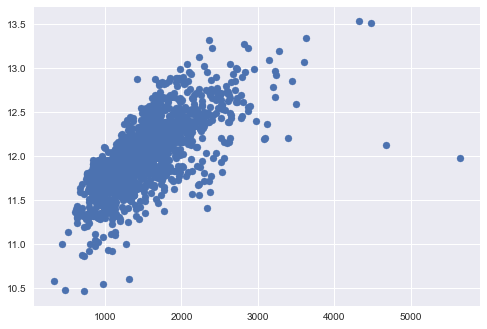

In [241]:
plt.scatter(data['GrLivArea'],target)
plt.show()

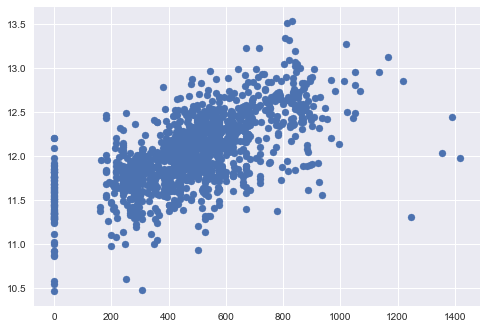

In [242]:
plt.scatter(data['GarageArea'],target)
plt.show()

In [243]:
data = data[data['GarageArea'] < 1200]
data = data[data['GrLivArea'] < 4000]
data=data[data['TotalBsmtSF']<5000]

In [244]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in objectivefeature.columns:
    data[i]=label.fit_transform(data[i])

In [250]:
X=data.iloc[:,1:-1].values
y=np.log(data.iloc[:,-1].values)

In [251]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [254]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(X,y)

In [256]:
X.shape

(1452, 61)

#### Backward elimination Can be used

In [257]:
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((1452,1)).astype(int),values=X,axis=1)
X_opt=X[:,list(range(0,62))]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     256.8
Date:                Fri, 26 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:01:02   Log-Likelihood:                 1084.6
No. Observations:                1452   AIC:                            -2049.
Df Residuals:                    1392   BIC:                            -1732.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0216      0.003   3912.107      0.000      12.016      12.028
x1             0.0007      0.007      0.103      0.918      -0.013       0.015
x2            -0.0092      0.004     -2.629      0.009      -0.016      -0.002
x3             0.0252      0.004      6.547      0.000       0.018       0.033
x4             0.0125      0.003      3.829      0.000       0.006       0.019
x5            -0.0049      0.003     -1.434      0.152      -0.012       0.002
x6            -0.0074      0.004     -2.113      0.035      -0.014      -0.001
x7            -0.0030      0.003     -0.942      0.347      -0.009       0.003
x8            -0.0039      0.003     -1.196      0.232      -0.010       0.002
x9            -0.0012      0.004     -0.302      0.763      -0.009       0.007
x10           -0.0011      0.003     -0.310      0.757      -0.008       0.006
x11            0.0026      0.003      0.794      0.428      -0.004       0.009
x12           -0.0027      0.003     -0.848      0.397      -0.009       0.004
x13           -0.0154      0.007     -2.356      0.019      -0.028      -0.003
x14            0.0018      0.005      0.400      0.689      -0.007       0.011
x15            0.0823      0.006     13.859      0.000       0.071       0.094
x16            0.0467      0.004     11.116      0.000       0.038       0.055
x17            0.0572      0.008      7.269      0.000       0.042       0.073
x18            0.0142      0.005      2.854      0.004       0.004       0.024
x19            0.0011      0.003      0.318      0.750      -0.006       0.008
x20           -0.0009      0.003     -0.284      0.776      -0.007       0.006
x21           -0.0142      0.006     -2.311      0.021      -0.026      -0.002
x22            0.0150      0.006      2.439      0.015       0.003       0.027
x23           -0.0126      0.005     -2.580      0.010      -0.022      -0.003
x24            0.0099      0.003      2.978      0.003       0.003       0.016
x25            0.0103      0.004      2.377      0.018       0.002       0.019
x26            0.0338      0.003      9.722      0.000       0.027       0.041
x27            0.0058      0.003      1.824      0.068      -0.000       0.012
x28            0.0007      0.003      0.248      0.805      -0.005       0.007
x29            0.0383      0.004      8.687      0.000       0.030       0.047
x30         1.535e-06      0.003      0.000      1.000      -0.007       0.007
x31           -0.0146      0.004     -3.744      0.000      -0.022      -0.007
x32            0.0194      0.004      4.783      0.000       0.011       0.027
x33           -0.0016      0.004     -0.446      0.656      -0.009       0.005
x34            0.0515      0.005      9.768      0.000       0.041       0.062
x35            0.0395      0.005      8.651      0.000       0.031       0.049
x3

In [140]:
model.score(X,y)

0.9047409389914961

In [141]:
prediction=model.predict(X)

In [144]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y, prediction))

RMSE is: 
 0.0148832610743


In [146]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [147]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [148]:
feats.shape

(1459, 38)

In [149]:
prediction=model.predict(feats)

In [153]:
final_predictions = np.exp(prediction)

In [155]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,124113.718589
1,1462,145586.636342
2,1463,175157.088536
3,1464,196350.619092
4,1465,178916.678089


In [156]:
submission.to_csv('submission1.csv', index=False)